# k-Means

In [1]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

class KMeans:
    def __init__(self, k=8, max_iterations=1000):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        N, self.p = X.shape
        if N < self.k:
            raise ValueError
        
        # Initialize centroids.
        perm = np.random.choice(N, self.k, replace=False)
        self.centroids = X[perm,:]
        self.tmp = np.zeros(self.centroids.shape)
        self.count = np.zeros([self.k, 1], dtype=int)
        
        # Updates.
        for _ in range(self.max_iterations):
            dist = euclidean_distances(X, self.centroids)
            labels = np.argmin(dist, axis=1)
            for point, label in zip(X, labels):
                self.tmp[label,:] += point
                self.count[label] += 1
            self.count[self.count == 0] = 1
            self.centroids = self.tmp / self.count
            self.tmp = np.zeros(self.centroids.shape)
            self.count = np.zeros([self.k, 1], dtype=int)

    def predict(self, X):
        if X.shape[1] != self.p:
            raise ValueError
        dist = euclidean_distances(X, self.centroids)
        labels = np.argmin(dist, axis=1)
        return labels.squeeze()

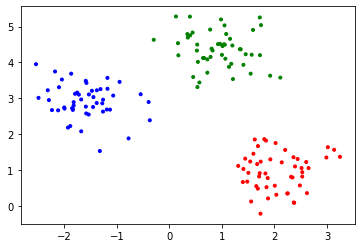

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Create dataset
X, _ = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# Cluster.
kmeans = KMeans(k=3)
kmeans.fit(X)
labels = kmeans.predict(X)

# Plot.
colors = ['red', 'green', 'blue']
c = [colors[i] for i in labels]
plt.scatter(
    X[:, 0], X[:, 1],
    c=c, marker='.')
plt.show()